In [581]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import scipy
scipy.__version__


df = pd.read_csv('Data/df_2002-2014_no_2007.csv.gz', low_memory=False)
df.head()

,imdb_id,budget,revenue,runtime,title,vote_average,certification
0,tt0096056,0.0,0.0,126.0,Crime and Punishment,5.500,NaN
1,tt0118926,0.0,5227348.0,132.0,The Dancer Upstairs,6.294,R
2,tt0119980,0.0,0.0,91.0,Random Shooting in LA,0.000,NaN
3,tt0120679,12000000.0,56298474.0,123.0,Frida,7.455,R
4,tt0120804,33000000.0,102984862.0,100.0,Resident Evil,6.602,R


In [582]:
df.dropna(subset=['certification'], inplace=True)
df.isna().sum()

imdb_id          0
budget           0
revenue          0
runtime          0
title            0
vote_average     0
certification    0
dtype: int64

In [583]:
df['certification'].value_counts()

R                                  3509
PG-13                              1863
NR                                 1646
PG                                  802
G                                   252
NC-17                                91
UR                                    1
Not Rated                             1
ScreamFest Horror Film Festival       1
12                                    1
R                                     1
PG-13                                 1
10                                    1
Name: certification, dtype: int64

## getting only the certifications I want

In [584]:
df['certification'] = df['certification'].str.strip()
df['certification'].value_counts()

R                                  3510
PG-13                              1864
NR                                 1646
PG                                  802
G                                   252
NC-17                                91
UR                                    1
Not Rated                             1
ScreamFest Horror Film Festival       1
12                                    1
10                                    1
Name: certification, dtype: int64

In [585]:
r_df = df.loc[(df['certification'] == 'R')]
r_df

,imdb_id,budget,revenue,runtime,title,vote_average,certification
1,tt0118926,0.0,5227348.0,132.0,The Dancer Upstairs,6.294,R
3,tt0120679,12000000.0,56298474.0,123.0,Frida,7.455,R
4,tt0120804,33000000.0,102984862.0,100.0,Resident Evil,6.602,R
11,tt0149253,0.0,0.0,96.0,Texas '46,3.500,R
15,tt0160184,55000000.0,6632383.0,96.0,D-Tox,5.613,R
...,...,...,...,...,...,...,...
44307,tt4197006,0.0,0.0,70.0,The Sect,3.000,R
44329,tt4209020,0.0,0.0,72.0,Here kitty kitty!,5.000,R
44538,tt4416878,0.0,0.0,51.0,Lake Nowhere,6.000,R
44561,tt4473620,0.0,0.0,90.0,Witching Hour,10.000,R


In [586]:
g_df = df.loc[(df['certification'] == 'G')]
g_df

,imdb_id,budget,revenue,runtime,title,vote_average,certification
10,tt0146063,0.0,0.0,88.0,The Princess and the Pea,7.100,G
27,tt0166813,80000000.0,122563539.0,83.0,Spirit: Stallion of the Cimarron,7.691,G
115,tt0243585,120000000.0,169956806.0,78.0,Stuart Little 2,5.738,G
231,tt0265662,20000000.0,75597042.0,127.0,The Rookie,6.719,G
276,tt0271582,0.0,1347988.0,91.0,Joshua,6.500,G
...,...,...,...,...,...,...,...
44228,tt4150316,0.0,0.0,45.0,Frozen in Time,4.800,G
44241,tt4157940,0.0,8520000.0,87.0,The Magical Brush,4.800,G
44558,tt4468650,0.0,0.0,0.0,神秘世界历险记2,6.500,G
44615,tt4591840,10000000.0,0.0,82.0,A Christmas Star,5.000,G


In [587]:
pg_df = df.loc[(df['certification'] == 'PG')]
pg_df

,imdb_id,budget,revenue,runtime,title,vote_average,certification
6,tt0121765,120000000.0,649398328.0,142.0,Star Wars: Episode II - Attack of the Clones,6.542,PG
8,tt0133240,140000000.0,109578115.0,95.0,Treasure Planet,7.530,PG
14,tt0157472,26000000.0,38793283.0,94.0,Clockstoppers,5.255,PG
140,tt0248169,0.0,505675.0,119.0,Manna from Heaven,0.000,PG
148,tt0250223,58500000.0,111127553.0,108.0,Asterix & Obelix: Mission Cleopatra,7.355,PG
...,...,...,...,...,...,...,...
43883,tt3949650,33989696.0,0.0,109.0,Doraemon: New Nobita's Great Demon – Peko and ...,7.044,PG
44036,tt4044488,0.0,0.0,95.0,Message of Hope,0.000,PG
44042,tt4045666,0.0,0.0,120.0,Mumbai Delhi Mumbai,6.300,PG
44072,tt4061848,0.0,0.0,53.0,Alpha and Omega: The Legend of the Saw Tooth Cave,6.476,PG


In [588]:
pg_13_df = df.loc[(df['certification'] == 'PG-13')]
pg_13_df

,imdb_id,budget,revenue,runtime,title,vote_average,certification
5,tt0120912,140000000.0,445135288.0,88.0,Men in Black II,6.348,PG-13
9,tt0145487,139000000.0,821708551.0,121.0,Spider-Man,7.248,PG-13
23,tt0164184,68000000.0,193921372.0,124.0,The Sum of All Fears,6.290,PG-13
29,tt0167261,79000000.0,926287400.0,179.0,The Lord of the Rings: The Two Towers,8.368,PG-13
34,tt0179098,21000000.0,10011050.0,117.0,Moonlight Mile,6.305,PG-13
...,...,...,...,...,...,...,...
44007,tt4027422,0.0,0.0,91.0,Subways,4.000,PG-13
44390,tt4246856,0.0,0.0,92.0,Wildflower,5.300,PG-13
44430,tt4288542,0.0,1695006.0,93.0,Viejos amigos,6.400,PG-13
44638,tt4684268,0.0,0.0,71.0,The Coffin Footage,3.200,PG-13


### Convert back to single df

In [589]:
df = pd.concat([g_df,pg_df,pg_13_df,r_df], ignore_index=True)
df

,imdb_id,budget,revenue,runtime,title,vote_average,certification
0,tt0146063,0.0,0.0,88.0,The Princess and the Pea,7.100,G
1,tt0166813,80000000.0,122563539.0,83.0,Spirit: Stallion of the Cimarron,7.691,G
2,tt0243585,120000000.0,169956806.0,78.0,Stuart Little 2,5.738,G
3,tt0265662,20000000.0,75597042.0,127.0,The Rookie,6.719,G
4,tt0271582,0.0,1347988.0,91.0,Joshua,6.500,G
...,...,...,...,...,...,...,...
6423,tt4197006,0.0,0.0,70.0,The Sect,3.000,R
6424,tt4209020,0.0,0.0,72.0,Here kitty kitty!,5.000,R
6425,tt4416878,0.0,0.0,51.0,Lake Nowhere,6.000,R
6426,tt4473620,0.0,0.0,90.0,Witching Hour,10.000,R


In [590]:
df1 = df.copy() #a copy for question 3

In [591]:
df['certification'].value_counts()

R        3510
PG-13    1864
PG        802
G         252
Name: certification, dtype: int64

## Questions to Answer


The stakeholder's first question is: does the MPAA rating of a movie (G/PG/PG-13/R) affect how much revenue the movie generates?

Null Hypothesis:  Different MPAA Ratings all have the same revenues.

Alternative Hypothesis: Different MPAA Ratings have different Revenues. 

Using an alpha=.05

Going to perform the ANOVA test

## Testing Assumptions

## Outliers

In [592]:
p = df.loc[ df['certification']=='P',"revenue"]
pg = df.loc[ df['certification']=='PG',"revenue"]
pg_13 = df.loc[ df['certification']=='PG-13',"revenue"]
r = df.loc[ df['certification']=='R',"revenue"]

In [593]:
zscores_f = stats.zscore(p)
outliers_p = abs(zscores_f)>3
np.sum(outliers_p)

0

Perfect, no outliers to remove.

In [594]:
zscores_f = stats.zscore(pg)
outliers_pg = abs(zscores_f)>3
np.sum(outliers_pg)

27

In [595]:
pg[~outliers_pg]

253     109578115.0
254      38793283.0
255        505675.0
256     111127553.0
257             0.0
           ...     
1049            0.0
1050            0.0
1051            0.0
1052            0.0
1053            0.0
Name: revenue, Length: 775, dtype: float64

In [596]:
pg = pg[~outliers_pg]

In [597]:
zscores_f = stats.zscore(pg_13)
outliers_pg_13 = abs(zscores_f)>3
np.sum(outliers_pg_13)

52

In [598]:
pg_13[~outliers_pg_13]

1054    445135288.0
1056    193921372.0
1058     10011050.0
1059      7103973.0
1060    358372926.0
           ...     
2913            0.0
2914            0.0
2915      1695006.0
2916            0.0
2917            0.0
Name: revenue, Length: 1812, dtype: float64

In [599]:
pg_13 = pg_13[~outliers_pg_13]

In [600]:
zscores_f = stats.zscore(r)
outliers_r = abs(zscores_f)>3
np.sum(outliers_r)

82

In [601]:
r[~outliers_r]

2918      5227348.0
2919     56298474.0
2920    102984862.0
2921            0.0
2922      6632383.0
           ...     
6423            0.0
6424            0.0
6425            0.0
6426            0.0
6427            0.0
Name: revenue, Length: 3428, dtype: float64

In [602]:
r = r[~outliers_r]

## Assumption of normality

In [603]:
## Create groups dictionary.
groups = {}
## Loop through all unique categories
for i in df['certification'].unique():
    ## Get series for group and rename
    data = df.loc[df['certification']==i,'revenue'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['G', 'PG', 'PG-13', 'R'])

In [604]:
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
G,252.0,4.894786e-61,277.739040
PG,802.0,2.583671e-134,615.194382
PG-13,1864.0,0.000000e+00,2067.031888
R,3510.0,0.000000e+00,3927.693039


In [605]:
### checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
G,252.0,4.894786e-61,277.739040,True
PG,802.0,2.583671e-134,615.194382,True
PG-13,1864.0,0.000000e+00,2067.031888,True
R,3510.0,0.000000e+00,3927.693039,True


#### The data is not normally distributed but because of our data size we can safely ignore this.

## Test Assumption of Equal Variance

In [606]:
# with the * operator 
stats.levene(*groups.values())
# not using * operator, entering each group manually
#stats.levene(groups[p],
           # groups[pg],
           # groups[pg_13]
           # groups[r])

LeveneResult(statistic=103.52523004815562, pvalue=1.8971317837887724e-65)

Our P value is less then our alpha of .05.  I reject the null hypothesis.  There is significant difference between our groups.

In [607]:
# perform the correct hypothesis test
# note again the use of the * operator for convenience
result = stats.f_oneway( *groups.values())
result

F_onewayResult(statistic=103.19011944196846, pvalue=3.0597325071304903e-65)

Significant result, with such a low p value we know there are differences between our groups revenue, now to find out which groups are different.

## Post-hoc multiple comparison tests

In [608]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
## save the values as revenue and the labels to the certification
values = df['revenue']
labels = df['certification']

In [609]:
## perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
G,PG,25692793.9513,0.0143,3701996.9562,47683590.9463,True
G,PG-13,26792458.1475,0.0042,6354254.3288,47230661.9663,True
G,R,-27074922.9739,0.0026,-46934211.5001,-7215634.4477,True
PG,PG-13,1099664.1963,0.9963,-11759953.3604,13959281.7529,False
PG,R,-52767716.9252,-0.0,-64685809.4375,-40849624.4128,True
PG-13,R,-53867381.1214,-0.0,-62594691.818,-45140070.4249,True


5 significant differences, all our groups are different in terms of revenue except for PG and PG-13.

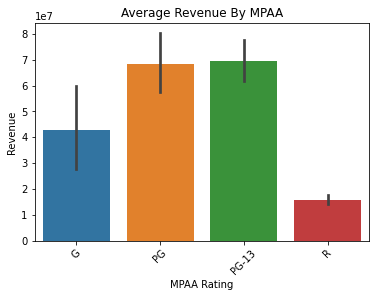

In [610]:
sns.barplot(data=df, x='certification', y= 'revenue')
plt.xticks(rotation = 45)
plt.title('Average Revenue By MPAA')
plt.xlabel('MPAA Rating')
plt.ylabel('Revenue');

Here we see that movies rated PG and PG-13 attain the highest amount of revenue and we have statistically backed that up with the ANOVA test.

### To answer the stackholders question we reject the null hypothesis as we see there is a significant difference in revenue based on a movies MPAA rating.

## Question 2
Does movie runtime affect revenue?

Null Hypothesis:  Runtime has no effect on a movies revenue.

Alternative Hypothesis: Runtime has a significant effect on movies revenue.

Using an alpha=.05

Going to perform a t test.

In [611]:
df = pd.read_csv('Data/df_2002-2014_no_2007.csv.gz', low_memory=False)
df.head()

,imdb_id,budget,revenue,runtime,title,vote_average,certification
0,tt0096056,0.0,0.0,126.0,Crime and Punishment,5.500,NaN
1,tt0118926,0.0,5227348.0,132.0,The Dancer Upstairs,6.294,R
2,tt0119980,0.0,0.0,91.0,Random Shooting in LA,0.000,NaN
3,tt0120679,12000000.0,56298474.0,123.0,Frida,7.455,R
4,tt0120804,33000000.0,102984862.0,100.0,Resident Evil,6.602,R


In [612]:
# remove unwanted columns
df = df.drop(columns = ['budget', 'vote_average','certification'])

## Going to split this into two groups using the median of the runtime column.

First I'm going to get all the movies that have an listed revenue.

In [613]:
rev_filter = df['revenue'] > 0

In [614]:
rev_df = df[rev_filter]
rev_df

,imdb_id,revenue,runtime,title
1,tt0118926,5227348.0,132.0,The Dancer Upstairs
3,tt0120679,56298474.0,123.0,Frida
4,tt0120804,102984862.0,100.0,Resident Evil
5,tt0120912,445135288.0,88.0,Men in Black II
6,tt0121765,649398328.0,142.0,Star Wars: Episode II - Attack of the Clones
...,...,...,...,...
44744,tt5232522,1958955.0,119.0,Dandelion
44758,tt5311228,9185.0,86.0,Smiley
44761,tt5320892,296000.0,80.0,Pat & Mat in a Movie
44770,tt5364756,1.0,96.0,Broadcasting Girl


In [615]:
rev_df['runtime'].median()

103.0

Now I'm splitting the data by the median.

In [616]:
high_run_filter = rev_df['runtime'] >= 103
high_run_filter.value_counts()

True     2439
False    2434
Name: runtime, dtype: int64

In [617]:
high_run_df = rev_df[high_run_filter]
high_run_df

,imdb_id,revenue,runtime,title
1,tt0118926,5227348.0,132.0,The Dancer Upstairs
3,tt0120679,56298474.0,123.0,Frida
6,tt0121765,649398328.0,142.0,Star Wars: Episode II - Attack of the Clones
9,tt0145487,821708551.0,121.0,Spider-Man
23,tt0164184,193921372.0,124.0,The Sum of All Fears
...,...,...,...,...
44507,tt4345774,25000.0,120.0,The Lies We Tell But the Secrets We Keep Part 3
44550,tt4443924,590000.0,130.0,Happy Journey
44661,tt4773112,910000.0,160.0,Bindaas
44744,tt5232522,1958955.0,119.0,Dandelion


In [618]:
low_run_df = rev_df[~high_run_filter]
low_run_df

,imdb_id,revenue,runtime,title
4,tt0120804,102984862.0,100.0,Resident Evil
5,tt0120912,445135288.0,88.0,Men in Black II
8,tt0133240,109578115.0,95.0,Treasure Planet
14,tt0157472,38793283.0,94.0,Clockstoppers
15,tt0160184,6632383.0,96.0,D-Tox
...,...,...,...,...
44652,tt4727514,27.0,90.0,The Last Avatar
44666,tt4799538,4240000.0,99.0,Night of Adventure
44758,tt5311228,9185.0,86.0,Smiley
44761,tt5320892,296000.0,80.0,Pat & Mat in a Movie


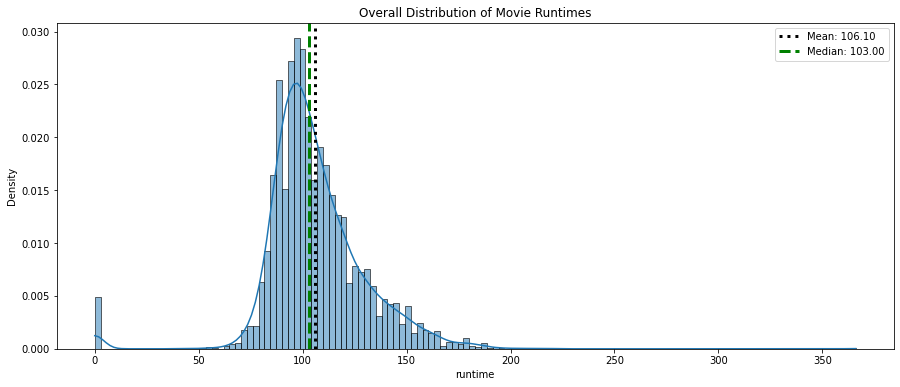

In [619]:
data = rev_df['runtime'].copy()
mean = np.mean(data)
med = np.median(data)
## Make figure and plot histogram
fig, ax = plt.subplots(figsize=(15,6))
sns.histplot(x=data, kde=True, ax=ax, stat='density')
ax.set_title('Overall Distribution of Movie Runtimes')
## Annotate mean and median
ax.axvline(mean,ls=':', color='black', lw=3, label =f"Mean: {mean:.2f}")
ax.axvline(med,ls='--', color='green', lw=3, label =f"Median: {med:.2f}")
ax.legend();

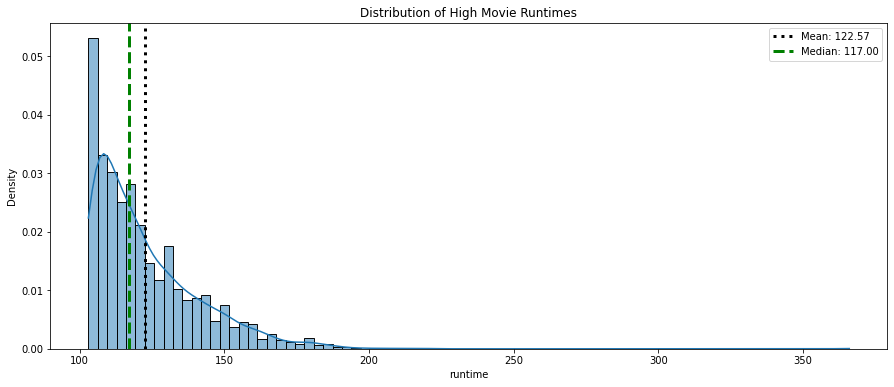

In [620]:
## Slice out data and calc stats
data = high_run_df['runtime'].copy()
mean = np.mean(data)
med = np.median(data)
## Make figure and plot histogram
fig, ax = plt.subplots(figsize=(15,6))
sns.histplot(x=data, kde=True, ax=ax, stat='density')
ax.set_title('Distribution of High Movie Runtimes')
## Annotate mean and median
ax.axvline(mean,ls=':', color='black', lw=3, label =f"Mean: {mean:.2f}")
ax.axvline(med,ls='--', color='green', lw=3, label =f"Median: {med:.2f}")
ax.legend();

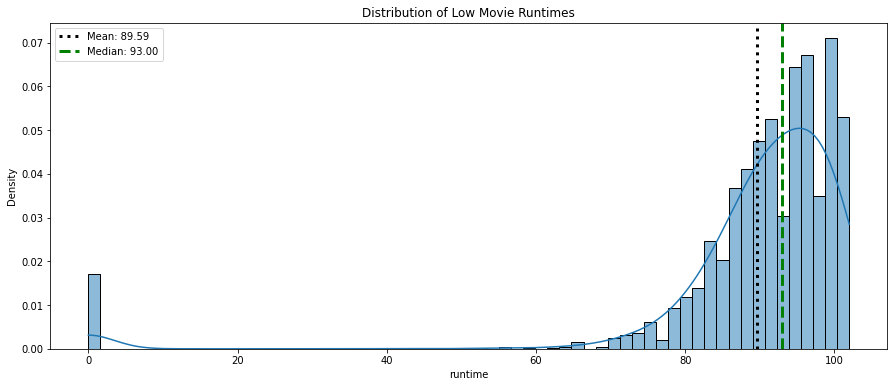

In [621]:
data = low_run_df['runtime'].copy()
mean = np.mean(data)
med = np.median(data)
## Make figure and plot histogram
fig, ax = plt.subplots(figsize=(15,6))
sns.histplot(x=data, kde=True, ax=ax, stat='density')
ax.set_title('Distribution of Low Movie Runtimes')
## Annotate mean and median
ax.axvline(mean,ls=':', color='black', lw=3, label =f"Mean: {mean:.2f}")
ax.axvline(med,ls='--', color='green', lw=3, label =f"Median: {med:.2f}")
ax.legend();

### Now that we visualized our overall data and the two sub sets lets begin checking assumptions.

## Testing Assumptions

## Outliers

In [622]:
filter_ = rev_df['runtime'] > 103
filter_

1         True
3         True
4        False
5        False
6         True
         ...  
44744     True
44758    False
44761    False
44770    False
44921     True
Name: runtime, Length: 4873, dtype: bool

In [623]:
filter_.value_counts()

False    2523
True     2350
Name: runtime, dtype: int64

In [624]:
h_df = rev_df.loc[filter_].copy()
l_df = rev_df.loc[~filter_].copy()

In [625]:
high_run = h_df['revenue']
low_run = l_df['revenue']

In [626]:
high_run

1          5227348.0
3         56298474.0
6        649398328.0
9        821708551.0
23       193921372.0
            ...     
44507        25000.0
44550       590000.0
44661       910000.0
44744      1958955.0
44921      6293794.0
Name: revenue, Length: 2350, dtype: float64

In [627]:
low_run

4        102984862.0
5        445135288.0
8        109578115.0
14        38793283.0
15         6632383.0
            ...     
44652           27.0
44666      4240000.0
44758         9185.0
44761       296000.0
44770            1.0
Name: revenue, Length: 2523, dtype: float64

In [628]:
zscores= stats.zscore(high_run)
outliers = abs(zscores)>3
np.sum(outliers)

64

In [629]:
high_run= high_run[(np.abs(stats.zscore(high_run))< 3)]

In [630]:
zscores= stats.zscore(low_run)
outliers_low = abs(zscores)>3
np.sum(outliers_low)

53

In [631]:
low_run= low_run[(np.abs(stats.zscore(low_run))< 3)]

Outliers dealt with.

## Checking Normality

In [632]:
result_high_run = stats.normaltest(high_run)
result_high_run

NormaltestResult(statistic=1262.4962819869313, pvalue=7.11894528197581e-275)

In [633]:
result_low_run = stats.normaltest(low_run)
result_low_run

NormaltestResult(statistic=1545.808509139459, pvalue=0.0)

Extremely low p values for both sets of data we know the data is not normally distributed.  However we have a large enough sample size to ignore this. 

## Checking for Equal Variance

In [634]:
# Test for equal variance
result = stats.levene(high_run, low_run)
result

LeveneResult(statistic=146.13976604841255, pvalue=3.692526475625232e-33)

We do not have equal variance so we will include "equal_var = False" when we perform our t-test.

## T Test

In [635]:
# Independent t-test with equal_var set to False
result = stats.ttest_ind(high_run, low_run, equal_var = False)
result

Ttest_indResult(statistic=12.542269786117775, pvalue=2.4359859732585343e-35)

### Our p value < alpha (0.05), so we reject the null hypothesis and support the alternative hypothesis that there is a significant difference between the revenue of movies who have runtime > 103 minutes and those who do not.

In [665]:
y = high_run_df['revenue'].mean().round(2)

In [666]:
x = low_run_df['revenue'].mean().round(2)

AttributeError: 'numpy.float64' object has no attribute 'barplot'

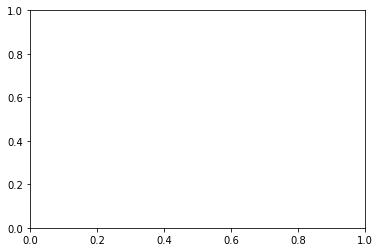

In [673]:
fig, ax = plt.subplots()
high_run_df['revenue'].mean().round().barplot()
low_run_df['revenue'].mean().round().barplot()
ax.set_xlabel("Amount budget or revenue in $")
ax.set_ylabel("Count")

## Question 3
Does a movies MPAA rating affect the movies budget?

Null Hypothesis:  MPAA rating has no effect on a movies vote budget.

Alternative Hypothesis: MPAA Rating has a significant effect on movies budget.

Using an alpha=.05

Going to perform a ANOVA Test.

In [638]:
df1.head()

,imdb_id,budget,revenue,runtime,title,vote_average,certification
0,tt0146063,0.0,0.0,88.0,The Princess and the Pea,7.100,G
1,tt0166813,80000000.0,122563539.0,83.0,Spirit: Stallion of the Cimarron,7.691,G
2,tt0243585,120000000.0,169956806.0,78.0,Stuart Little 2,5.738,G
3,tt0265662,20000000.0,75597042.0,127.0,The Rookie,6.719,G
4,tt0271582,0.0,1347988.0,91.0,Joshua,6.500,G


## Testing Assumptions

### Outliers

In [639]:
p = df1.loc[ df1['certification']=='P',"budget"]
pg = df1.loc[ df1['certification']=='PG',"budget"]
pg_13 = df1.loc[ df1['certification']=='PG-13',"budget"]
r = df1.loc[ df1['certification']=='R',"budget"]

In [640]:
zscores_f = stats.zscore(p)
outliers_p = abs(zscores_f)>3
np.sum(outliers_p)

0

In [641]:
zscores_f = stats.zscore(pg)
outliers_pg = abs(zscores_f)>3
np.sum(outliers_pg)

18

In [642]:
pg[~outliers_pg]

252     120000000.0
253     140000000.0
254      26000000.0
255             0.0
256      58500000.0
           ...     
1049     33989696.0
1050            0.0
1051            0.0
1052            0.0
1053            0.0
Name: budget, Length: 784, dtype: float64

In [643]:
pg = pg[~outliers_pg]

In [644]:
zscores_f = stats.zscore(pg_13)
outliers_pg_13 = abs(zscores_f)>3
np.sum(outliers_pg_13)

54

In [645]:
pg_13[~outliers_pg_13]

1054    140000000.0
1055    139000000.0
1056     68000000.0
1057     79000000.0
1058     21000000.0
           ...     
2913            0.0
2914            0.0
2915            0.0
2916            0.0
2917            0.0
Name: budget, Length: 1810, dtype: float64

In [646]:
pg_13 = pg_13[~outliers_pg_13]

In [647]:
zscores_f = stats.zscore(r)
outliers_r = abs(zscores_f)>3
np.sum(outliers_r)

84

In [648]:
r[~outliers_r]

2918           0.0
2919    12000000.0
2920    33000000.0
2921           0.0
2922    55000000.0
           ...    
6423           0.0
6424           0.0
6425           0.0
6426           0.0
6427           0.0
Name: budget, Length: 3426, dtype: float64

In [649]:
r = r[~outliers_r]

### Outliers dealt with

## Assumption of normality

In [650]:
groups = {}
## Loop through all unique categories
for i in df1['certification'].unique():
    ## Get series for group and rename
    data = df1.loc[df1['certification']==i,'budget'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['G', 'PG', 'PG-13', 'R'])

In [651]:
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
G,252.0,2.869015e-45,205.124721
PG,802.0,3.240645e-85,389.087921
PG-13,1864.0,2.464636e-236,1085.016076
R,3510.0,0.000000e+00,3000.247283


Plenty of data to work with.

In [652]:
### checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
G,252.0,2.869015e-45,205.124721,True
PG,802.0,3.240645e-85,389.087921,True
PG-13,1864.0,2.464636e-236,1085.016076,True
R,3510.0,0.000000e+00,3000.247283,True


#### Again the data is not normally distributed but because of our data size we can safely ignore this.

## Equal Variance

In [653]:
stats.levene(*groups.values())

LeveneResult(statistic=148.37311260816296, pvalue=5.725501369805577e-93)

Our P value is less then our alpha of .05.  I reject the null hypothesis.  There is significant difference between our groups.

In [654]:
bud_result = stats.f_oneway( *groups.values())
bud_result

F_onewayResult(statistic=144.2719462234508, pvalue=1.7903190969995275e-90)

With such a low p value there is this is a significant result, meaning I reject the null hypothesis as we have supported the alternative hypothesis.  Now to find out which groups are different.

## Post-hoc multiple comparison tests

In [655]:
## save the values as budget and the labels to the certification
values = df1['budget']
labels = df1['certification']

In [656]:
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
G,PG,10239033.8725,0.0001,4324147.1515,16153920.5935,True
G,PG-13,11084133.0184,0.0,5586848.841,16581417.1958,True
G,R,-6191448.8903,0.0154,-11533021.6409,-849876.1397,True
PG,PG-13,845099.1459,0.9231,-2613765.0845,4303963.3763,False
PG,R,-16430482.7628,-0.0,-19636104.0578,-13224861.4678,True
PG-13,R,-17275581.9087,-0.0,-19622975.4188,-14928188.3985,True


Similar to what we saw with the revenue test, 5 significant differences, all our groups are different in terms of revenue except for PG and PG-13.

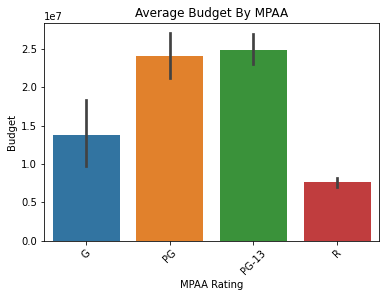

In [658]:
sns.barplot(data=df1, x='certification', y= 'budget')
plt.xticks(rotation = 45)
plt.title('Average Budget By MPAA')
plt.xlabel('MPAA Rating')
plt.ylabel('Budget');

This bar plot shows us what I had surmised but now supported that different MPAA Ratings get different budgets.